In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..

/proj/som


In [3]:
import torch
from .som import som_learner, UnsupervisedDataset, SomInterpretation

In [22]:
from torch import Tensor
from sklearn.datasets import load_iris
from typing import Tuple
from itertools import combinations_with_replacement, product

def iris():
    "Loads the IRIS dataset into two tensors."
    iris = load_iris()
    x = torch.tensor(iris.data)
    y = torch.tensor(iris.target)
    labels = iris.feature_names
    map_size = (4,4)
    alpha = 0.3
    bs = 10
    epochs = 30
    return x, y, labels, map_size, alpha, bs, epochs

def colors_uniform():
    k = 50
    x = [list(x) for x in product(list(range(k)), repeat=3)]
    from random import shuffle
    shuffle(x)
    x = torch.FloatTensor(x) * (255 / (k-1));
    y = None
    labels = ['Red', 'Green', 'Blue']
    map_size = (10, 10)
    alpha = 0.03
    bs = 50
    epochs = 100
    return x, y, labels, map_size, alpha, bs, epochs

def colors(n: int = 11000):
    "Loads a dataset containing all possible RGB color combinations"
#     x = torch.zeros(n, 3).normal_(mean=80.0, std=127.0).long().float()
    x = torch.zeros(n, 3).uniform_(0, 255).long().float()
    y = None
    labels = ['Red', 'Green', 'Blue']
    map_size = (10, 10)
    alpha = 0.03
    bs = 25
    epochs = 100
    return x, y, labels, map_size, alpha, bs, epochs


def colors_small():
    "Loads a dataset containing all possible RGB color combinations"
    x = torch.FloatTensor([
        [3, 255, 0],
        [0, 247, 3],
        [0, 252, 5],
        [3, 239, 8],
        [0, 232, 3],
        [3, 255, 0],
        [0, 250, 5],
        [255, 3, 0],
        [247, 3, 0],
        [252, 5, 0],
        [239, 8, 3],
        [232, 0, 3],
        [255, 3, 3],
        [249, 5, 3],
        [247, 3, 5],
        [3, 0, 255],
        [3, 0, 247],
        [5, 0, 252],
        [8, 2, 239],
        [0, 3, 232],
        [3, 3, 255],
        [5, 3, 249],
        [3, 5, 247],
        [8, 3, 234],
        [3, 5, 247],
        [5, 3, 234],
    ])
    y = None
    labels = ['Red', 'Green', 'Blue']
    map_size = (3, 3)
    alpha = 0.01
    bs = 4
    epochs = 100
    return x, y, labels, map_size, alpha, bs, epochs

def uniform(n: int = 11000, s: int = 3):
    "Loads a uniform dataset"
    x = torch.randn(n, s)
    y = None
    labels = list(range(s))
    map_size = (6, 6)
    alpha = 0.03
    bs = 50
    epochs = 150
    return x, y, labels, map_size, alpha, bs, epochs
    

In [23]:
x, y, labels, map_size, alpha, bs, epochs = colors_uniform()

In [24]:
x.shape

torch.Size([125000, 3])

In [25]:
size = (map_size[0], map_size[1], x.shape[-1])
size

(10, 10, 3)

In [26]:
x[0]

tensor([ 98.8775, 255.0000, 228.9796])

In [27]:
x.shape

torch.Size([125000, 3])

In [28]:
ud = UnsupervisedDataset.create(train=x, valid=0.1, bs=bs, normalizer='minmax', shuffle=False)

In [29]:
ud.train.shape, ud.valid.shape

(torch.Size([112500, 3]), torch.Size([12500, 3]))

In [30]:
ud.train.mean(), ud.train.std()

(tensor(127.5254, device='cuda:0'), tensor(75.1229, device='cuda:0'))

In [31]:
alpha, bs, epochs

(0.03, 50, 100)

In [32]:
%matplotlib notebook
learn = som_learner(ud, map_size=map_size, init='random', alpha=alpha)
learn.fit(epochs, visualize_dim=2, visualize=False, debug=False, plot_hyperparams=False)

In [33]:
interp = SomInterpretation.from_learner(learn)

AttributeError: 'UnsupervisedDataset' object has no attribute 'train_ds'

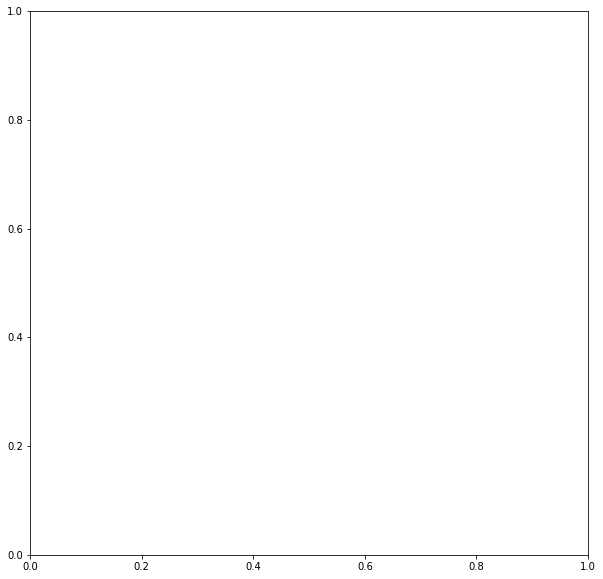

In [34]:
%matplotlib inline
interp.show_hitmap()

In [ ]:
interp.show_weights()

In [ ]:
interp.show_feature_heatmaps(labels=labels)